# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
230825,0.7983,0.0513,0.8862,0.8032,0.1025,0.1343,0.6738,0.5249,0.8887,0.0757,5,5,16,16
205408,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0903,0.0024,0.0439,5,0,13,13
113331,0.1489,0.9351,0.1294,0.0073,0.0024,0.0293,1.7554,0.3931,0.4272,1.2085,5,5,2,2
156006,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0610,0.0024,0.1221,6,0,7,7
420019,0.0024,0.0049,0.0171,0.0024,0.0024,0.0024,0.0049,0.1270,0.0757,0.0122,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [83]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(6000, activation='relu')(visible)
hidden2 = Dense(3000, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(1500, activation='relu')(hidden3)
hidden5 = Dense(750, activation='relu')(hidden4)
hidden6 = Dropout(0.2)(hidden5)
hidden7 = Dense(48, activation='relu')(hidden6)
output = Dense(num_classes, activation='softmax')(hidden7)
model = Model(inputs=visible, outputs=output)

In [84]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_46 (Dense)            (None, 6000)              66000     
                                                                 
 dense_47 (Dense)            (None, 3000)              18003000  
                                                                 
 dropout_1 (Dropout)         (None, 3000)              0         
                                                                 
 dense_48 (Dense)            (None, 1500)              4501500   
                                                                 
 dense_49 (Dense)            (None, 750)               1125750   
                                                                 
 dropout_2 (Dropout)         (None, 750)               0   

# 2. Compile Network

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [87]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 7s 87ms/step - loss: 1.3918 - accuracy: 0.6395 - val_loss: 0.9473 - val_accuracy: 0.7470
Epoch 2/300
75/75 [==============================] - 6s 86ms/step - loss: 0.8393 - accuracy: 0.7712 - val_loss: 0.7222 - val_accuracy: 0.8002
Epoch 3/300
75/75 [==============================] - 7s 87ms/step - loss: 0.6778 - accuracy: 0.8097 - val_loss: 0.6209 - val_accuracy: 0.8250
Epoch 4/300
75/75 [==============================] - 7s 87ms/step - loss: 0.5891 - accuracy: 0.8322 - val_loss: 0.5399 - val_accuracy: 0.8457
Epoch 5/300
75/75 [==============================] - 7s 88ms/step - loss: 0.5468 - accuracy: 0.8434 - val_loss: 0.4963 - val_accuracy: 0.8568
Epoch 6/300
75/75 [==============================] - 7s 87ms/step - loss: 0.4967 - accuracy: 0.8562 - val_loss: 0.4646 - val_accuracy: 0.8655
Epoch 7/300
75/75 [==============================] - 6s 87ms/step - loss: 0.4674 - accuracy: 0.8648 - val_loss: 0.4362 - val_accuracy: 0.8744
Epoch 

75/75 [==============================] - 7s 91ms/step - loss: 0.1869 - accuracy: 0.9472 - val_loss: 0.2240 - val_accuracy: 0.9385
Epoch 59/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1850 - accuracy: 0.9479 - val_loss: 0.2253 - val_accuracy: 0.9387
Epoch 60/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1836 - accuracy: 0.9482 - val_loss: 0.2205 - val_accuracy: 0.9399
Epoch 61/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1814 - accuracy: 0.9490 - val_loss: 0.2299 - val_accuracy: 0.9388
Epoch 62/300
75/75 [==============================] - 7s 92ms/step - loss: 0.1817 - accuracy: 0.9488 - val_loss: 0.2264 - val_accuracy: 0.9388
Epoch 63/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1814 - accuracy: 0.9488 - val_loss: 0.2181 - val_accuracy: 0.9409
Epoch 64/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1796 - accuracy: 0.9494 - val_loss: 0.2214 - val_accuracy: 0.9399
Epoch 65/300

75/75 [==============================] - 7s 89ms/step - loss: 0.1431 - accuracy: 0.9593 - val_loss: 0.2205 - val_accuracy: 0.9455
Epoch 116/300
75/75 [==============================] - 7s 89ms/step - loss: 0.1433 - accuracy: 0.9593 - val_loss: 0.2150 - val_accuracy: 0.9468
Epoch 117/300
75/75 [==============================] - 7s 89ms/step - loss: 0.1422 - accuracy: 0.9597 - val_loss: 0.2095 - val_accuracy: 0.9471
Epoch 118/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1381 - accuracy: 0.9612 - val_loss: 0.2152 - val_accuracy: 0.9470
Epoch 119/300
75/75 [==============================] - 7s 90ms/step - loss: 0.2284 - accuracy: 0.9396 - val_loss: 0.2329 - val_accuracy: 0.9406
Epoch 120/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1594 - accuracy: 0.9549 - val_loss: 0.2172 - val_accuracy: 0.9453
Epoch 121/300
75/75 [==============================] - 7s 89ms/step - loss: 0.1443 - accuracy: 0.9592 - val_loss: 0.2148 - val_accuracy: 0.9467
Epoch 

Epoch 172/300
75/75 [==============================] - 7s 92ms/step - loss: 0.1192 - accuracy: 0.9665 - val_loss: 0.2211 - val_accuracy: 0.9498
Epoch 173/300
75/75 [==============================] - 7s 92ms/step - loss: 0.1251 - accuracy: 0.9648 - val_loss: 0.2197 - val_accuracy: 0.9502
Epoch 174/300
75/75 [==============================] - 7s 96ms/step - loss: 0.1188 - accuracy: 0.9665 - val_loss: 0.2186 - val_accuracy: 0.9502
Epoch 175/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1188 - accuracy: 0.9665 - val_loss: 0.2187 - val_accuracy: 0.9493
Epoch 176/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1187 - accuracy: 0.9664 - val_loss: 0.2205 - val_accuracy: 0.9502
Epoch 177/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1191 - accuracy: 0.9660 - val_loss: 0.2213 - val_accuracy: 0.9496
Epoch 178/300
75/75 [==============================] - 7s 92ms/step - loss: 0.1194 - accuracy: 0.9664 - val_loss: 0.2180 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1061 - accuracy: 0.9697 - val_loss: 0.2313 - val_accuracy: 0.9510
Epoch 230/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1078 - accuracy: 0.9695 - val_loss: 0.2309 - val_accuracy: 0.9497
Epoch 231/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1085 - accuracy: 0.9691 - val_loss: 0.2252 - val_accuracy: 0.9508
Epoch 232/300
75/75 [==============================] - 7s 91ms/step - loss: 0.1063 - accuracy: 0.9699 - val_loss: 0.2355 - val_accuracy: 0.9506
Epoch 233/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1069 - accuracy: 0.9696 - val_loss: 0.2301 - val_accuracy: 0.9511
Epoch 234/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1062 - accuracy: 0.9697 - val_loss: 0.2332 - val_accuracy: 0.9507
Epoch 235/300
75/75 [==============================] - 7s 90ms/step - loss: 0.1054 - accuracy: 0.9700 - val_loss: 0.2310 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 7s 89ms/step - loss: 0.0993 - accuracy: 0.9715 - val_loss: 0.2333 - val_accuracy: 0.9513
Epoch 287/300
75/75 [==============================] - 7s 89ms/step - loss: 0.1040 - accuracy: 0.9703 - val_loss: 0.2348 - val_accuracy: 0.9524
Epoch 288/300
75/75 [==============================] - 7s 89ms/step - loss: 0.0986 - accuracy: 0.9717 - val_loss: 0.2374 - val_accuracy: 0.9510
Epoch 289/300
75/75 [==============================] - 7s 91ms/step - loss: 0.0973 - accuracy: 0.9721 - val_loss: 0.2383 - val_accuracy: 0.9521
Epoch 290/300
75/75 [==============================] - 7s 90ms/step - loss: 0.0968 - accuracy: 0.9721 - val_loss: 0.2368 - val_accuracy: 0.9523
Epoch 291/300
75/75 [==============================] - 7s 90ms/step - loss: 0.0980 - accuracy: 0.9718 - val_loss: 0.2398 - val_accuracy: 0.9508
Epoch 292/300
75/75 [==============================] - 7s 90ms/step - loss: 0.0991 - accuracy: 0.9717 - val_loss: 0.2376 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

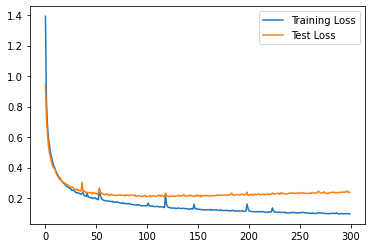

In [88]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

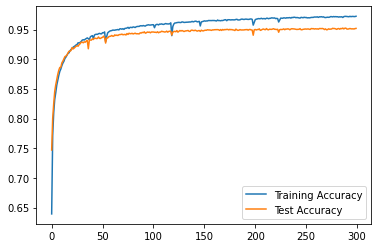

In [89]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [90]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 5s 2ms/step - loss: 0.2395 - accuracy: 0.9518


##  4.3 Make Predictions

In [91]:
predictions = model.predict(X_test)

In [92]:
predictions

array([[9.9888319e-01, 7.7599687e-09, 8.2438200e-06, ..., 3.1452699e-10,
        1.1976146e-09, 1.8431401e-09],
       [1.2249309e-38, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.8174864e-01, 2.5025990e-03, 5.6019810e-05, ..., 9.7371689e-08,
        8.7936197e-10, 3.1272403e-08],
       ...,
       [9.3430941e-08, 4.4309522e-19, 1.4830009e-18, ..., 1.1566554e-18,
        6.4325312e-18, 6.8091419e-22],
       [9.7403699e-01, 1.2363612e-03, 1.5736772e-02, ..., 7.1943606e-07,
        2.7612450e-07, 2.9972088e-07],
       [5.6649567e-11, 8.7700572e-15, 9.2748458e-09, ..., 5.1959774e-19,
        6.3780950e-15, 1.6337544e-24]], dtype=float32)